# Prueba con LighGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lightgbm as lgb
import json

In [30]:
#INPUT
input = 'HT001-FE002'
fe = input.split("-")[1]
#EXPERIMENTO
experimento = 'EN-003'

#CARGO DATASETS
os.chdir("C:/Users/vyago/Desktop/Yago/Competencia/ypf")  # Directorio actual
train = pd.read_csv(f"../Exp/{fe}/train.csv")
test = pd.read_csv(f"../Exp/{fe}/test.csv")

In [16]:
#LEO LAS SALIDAS DE LA OPTIMIZACIÓN BAYESIANA DEL EXPERIMENTO

log_bo = pd.read_csv(f'../Exp/{input}/HT.csv', sep=",")

In [17]:
log_bo = log_bo.sort_values("loss")
log_bo["params"][0].replace("\'", "\"")



'{"feature_fraction": 0.5613312063035217, "learning_rate": 0.026639807051897578, "min_data_in_leaf": 2565, "num_leaves": 1137, "boosting_type": "gbdt", "subsample": 1.0, "max_bin": 256, "objective": "regression", "feature_pre_filter": False}'

In [20]:
log_bo["numero_de_iteracioniteration"][0]

45778

In [25]:
train = train.select_dtypes("number")

In [26]:
y_train = np.sqrt(train["delta_WHP"])
x_train = train[train.columns.drop(["delta_WHP","ID_FILA"])]#,"ID_EVENTO"])]

c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
train_data = lgb.Dataset(x_train, label=y_train)


In [28]:
# Parámetros 

#params = {"feature_fraction": 0.5613312063035217, "learning_rate": 0.026639807051897578, "min_data_in_leaf": 2565, "num_leaves": 1137, "boosting_type": "gbdt", "max_bin": 128, "objective": "regression", "feature_pre_filter": False}
params = {"feature_fraction": 0.5613312063035217, "learning_rate": 0.026639807051897578, "min_data_in_leaf": 2565, "num_leaves": 1137, "boosting_type": "gbdt", "max_bin": 256, "objective": "regression", "feature_pre_filter": False}
params['metric'] = 'rmse' # métrica
params["num_iterations"] = 45778
params["max_depth"] = -1

In [29]:
modelo=lgb.train(params,train_data)

c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4452
[LightGBM] [Info] Number of data points in the train set: 26178, number of used features: 31
[LightGBM] [Info] Start training from score 0.330165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [31]:
x_test = test[x_train.columns]
x_test = x_test.astype("float32")
test["delta_WHP"]=np.square(modelo.predict(x_test))
prediccion=test[["ID_FILA","delta_WHP"]]


In [32]:
modelo.feature_importance

<bound method Booster.feature_importance of <lightgbm.basic.Booster object at 0x0000024A404A4520>>

In [33]:
if not os.path.isdir(f'../Exp/{experimento}'):
    os.makedirs(f'../Exp/{experimento}')
 
prediccion.to_csv(f"../Exp/{experimento}/prediccion.csv",header=False,index=False)

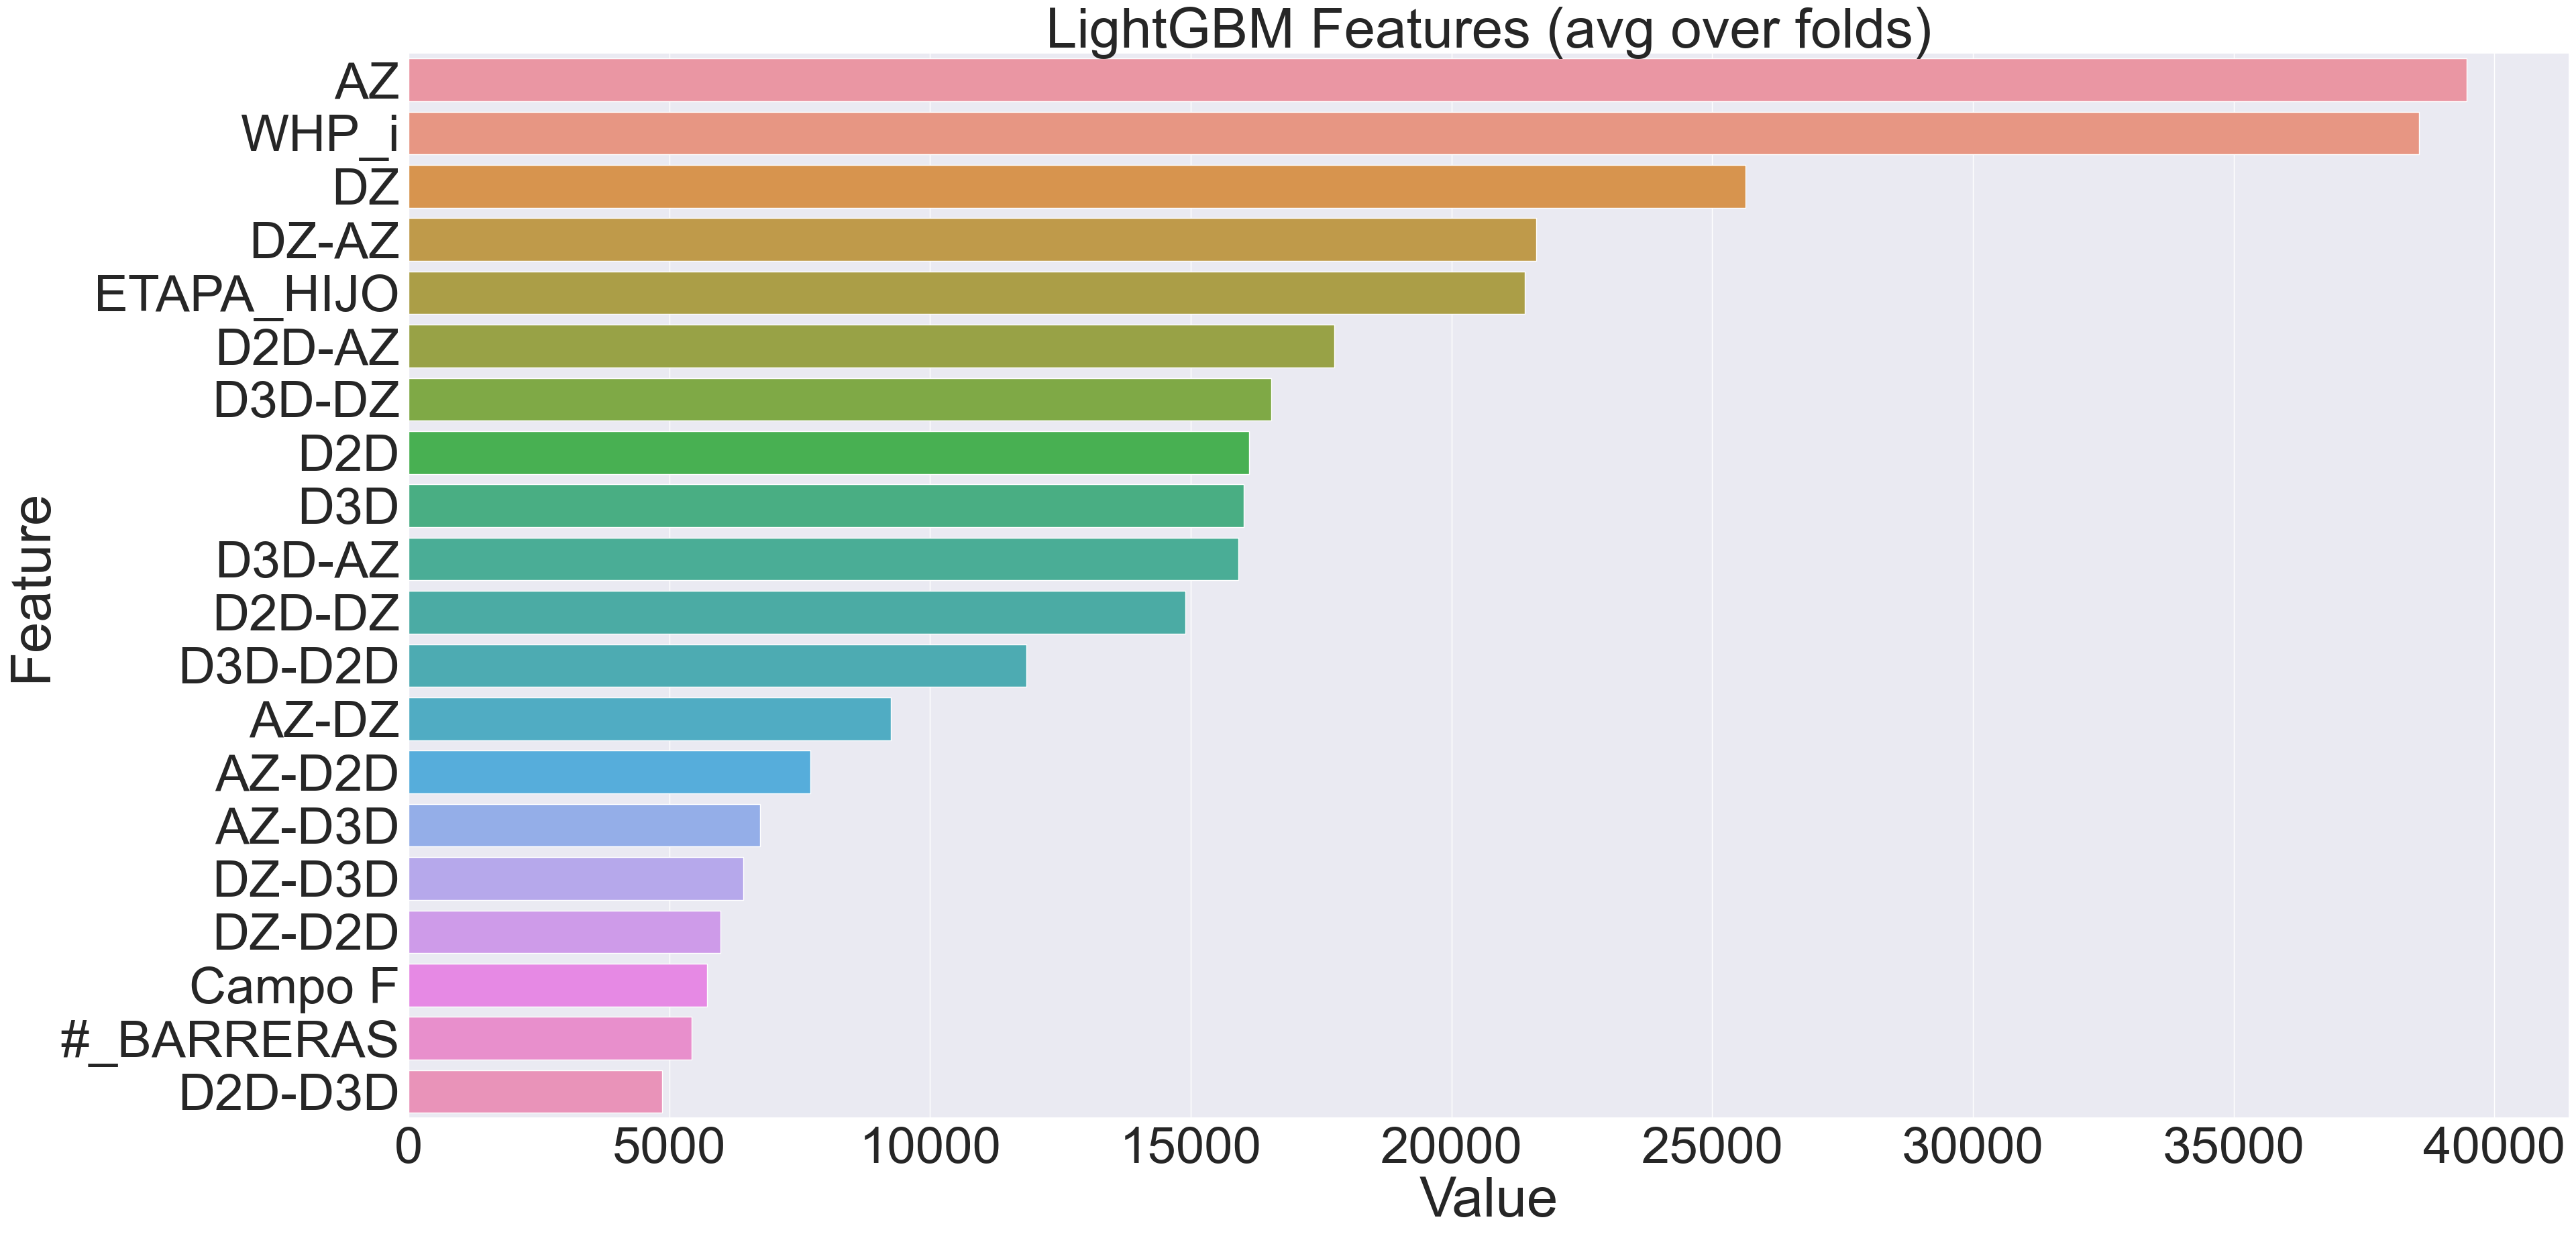

In [41]:
#IMPORTANCIA DE FEATURES

def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

    plt.show()
    
plotImp(modelo,x_train)

In [ ]:
"""max_bin 
learning_rate    
num_iterations    
num_leaves        
min_data_in_leaf  
feature_fraction  
semilla  """         